In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [26]:
f = open('execution_data.json')
json_data  = json.load(f)

f.close()
# execution_times = np.array([thread["execution time"] for thread in json_data["Threads"]])

344


Text(0,0.5,'Average Throughput')

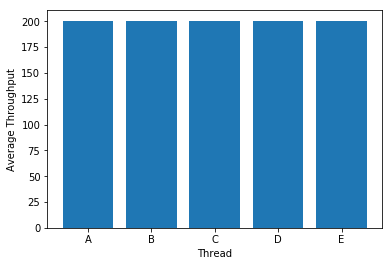

In [27]:
#execution benchmark
# thread_under_execution = np.array([])
# for threads in json_data["Threads"]:
#     if "thread" in threads:
#         thread_under_execution = np.append(thread_under_execution,threads["thread"])
#     else:
#         thread_under_execution = np.append(thread_under_execution,"NULL")
# # print(thread_under_execution)
# # thread_under_execution = np.array([thread["thread"] for thread in json_data["Threads"]])
# unique_threads = np.unique(thread_under_execution)
# unique_threads = np.delete(unique_threads, np.where(unique_threads == "NULL"))
# print(unique_threads)
# throughput = np.zeros(len(unique_threads))
# for threads in json_data["Threads"]:
#     if "exitedThread" in threads:
#         time = threads["time"]
#         exitedThread = threads["exitedThread"]
#         i = np.where(unique_threads == exitedThread)[0][0];
#         throughput[i] = process_time*1000/time
# print(throughput)
# plt.bar(unique_threads, throughput)
# plt.xlabel("Thread")
# plt.ylabel("Overall Throughput")



thread_data = {}
for data in json_data["Threads"]:
    thread = data["thread"].split()[1]
    if "exitedThread" in data:
        break
    if thread not in thread_data:
        thread_data[thread] = {
            "time_of_last_execution": data["time"],
            "weight": data["weight"],
            "no_of_executions": 0
        }
    
    thread_data[thread]["time_of_last_execution"] = data['time']
    thread_data[thread]["no_of_executions"] += 1
 
finish_time = 0
for thread in thread_data:
    finish_time = max(finish_time, thread_data[thread]["time_of_last_execution"])

print(finish_time)


unique_threads = []
throughput = []
for thread in thread_data:
    unique_threads.append(thread)
    throughput.append(thread_data[thread]["no_of_executions"] * 1000 / finish_time)
    
plt.bar(unique_threads, throughput)
plt.xlabel("Thread")
plt.ylabel("Average Throughput")


[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460]


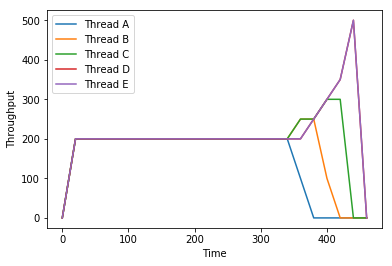

{'A': [0, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 100, 0, 0, 0, 0, 0], 'B': [0, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 250, 250, 100, 0, 0, 0], 'C': [0, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 250, 250, 300, 300, 0, 0], 'D': [0, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 250, 300, 350, 500, 0], 'E': [0, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 250, 300, 350, 500, 0]}


In [28]:
# process_time = 100
# time_array = np.array([thread["time"] for thread in json_data["Threads"]])

# num_threads_till_time_t = []
# for unique_thread in unique_threads:
#   num_threads_till_time_t.append(np.zeros(len(json_data["Threads"])))
# for time in range(len(json_data["Threads"])):
#   for unique_thread_index in range(len(unique_threads)):
#     if "thread" in json_data["Threads"][time]:
#       if json_data["Threads"][time]["thread"] == unique_threads[unique_thread_index]:
#         num_threads_till_time_t[unique_thread_index][time] += 1

# # Slicing time array for better readability 
# # equal : [10:40]
# # priority : [10:30]
# time_array = time_array[10:30]

# #Calculating Throughput
# num_array=1;
# for array in num_threads_till_time_t:
#   count=0;
#   for i in range(len(array)):
#     if array[i]==1:
#       count+=1
#       array[i] = (count*process_time*1000)/(i+1)
#     if array[i]==0:
#       array[i] = (count*process_time*1000)/(i+1)
#   array = array[10:30]
#   plt.plot(time_array,array, label=f"Thread {num_array}")
#   num_array+=1

# # Graph attributes
# # equal : (0,10000,1000)
# #priority : (0,8000,500)
# plt.yticks(np.arange(0, 8000, 500))
# plt.xlabel("Time")
# plt.ylabel("Throughput")
# plt.legend()
# plt.show()


thread_data = {}
thread_throughput_data = {}
for thread in unique_threads:
    thread_throughput_data[thread] = [0]*100
i = 0


for data in json_data["Threads"]:
    if data["time"] % 20 == 0:
        for thread in thread_data:
            thread_throughput_data[thread][i] = thread_data[thread][
                "no_of_execution"
            ] * 50
        i += 1
        thread_data.clear()
        
    thread = data["thread"].split()[1]
    
    if thread not in thread_data:
        thread_data[thread] = {
            "no_of_execution": 1,
            "first_execution_time": data["time"],
            "last_execution_time": data["time"]
        }
    else:
        thread_data[thread]["no_of_execution"] += 1
        thread_data[thread]["last_execution_time"] = data["time"]
        
time = 0
time_array = []
for j in range(i+1):
    time_array.append(20 * j)
print(time_array)
    
for thread in thread_throughput_data:
    thread_throughput_data[thread] = thread_throughput_data[thread][:i+1]
    plt.plot(time_array, thread_throughput_data[thread], label=f"Thread {thread}")

plt.ylabel("Throughput")
plt.xlabel("Time")
plt.legend()
plt.show()

print(thread_throughput_data)